# Rolling & Expanding
시계열 데이터를 처리하고 분석하는 과정에서 Moving Average 를 구하기 위해 rolling mean 을 자주 사용하게 됩니다. pandas 는 이를 처리하기 위해 편리한 방법을 제공합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 시계열 데이터를 인덱스와 함께 읽는 방법
df = pd.read_csv('data/apple_stock.csv', 
                 index_col='Date', parse_dates=True)

In [3]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


저장된 시간 형식을 임의로 지정해서 datetime 형태로 데이터 읽어오기

In [5]:
# 시간 형식 지정 ; strftime.org 참조
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")

# TEST
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [6]:
# putting all together
df = pd.read_csv('data/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'],
                 date_parser=dateparser)

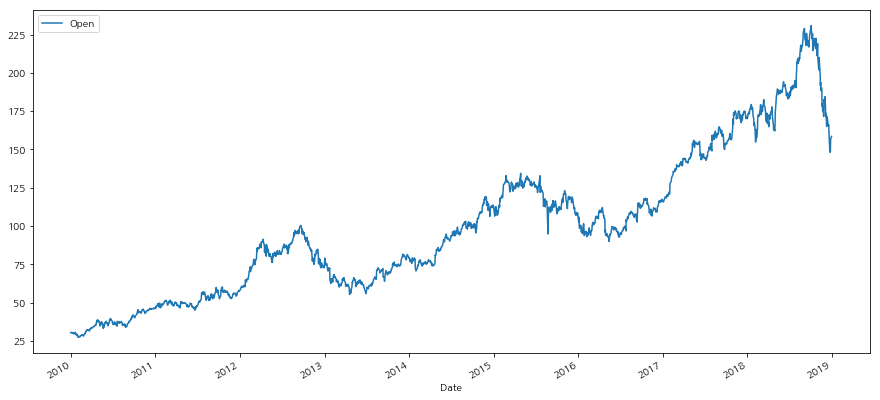

In [7]:
# Open 칼럼 시각화
df[['Open']].plot(figsize=(15,7))

**rolling** 메서드는 일정 시간구간의 윈도우를 row 엔트리로 만들어냅니다.

In [8]:
# 7 day rolling mean
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


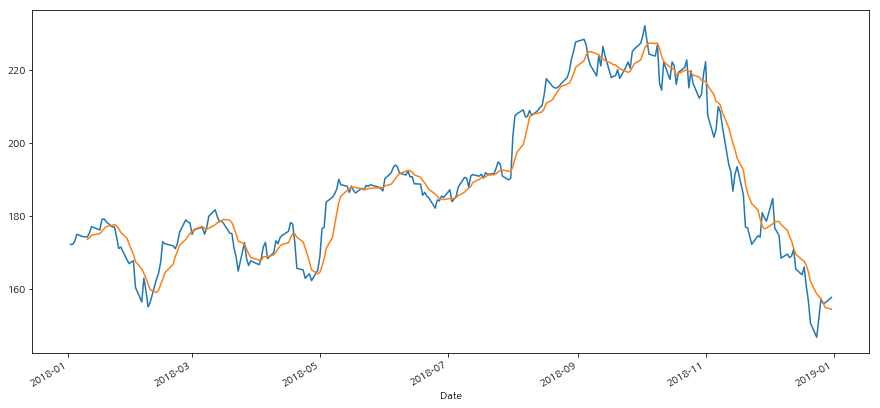

In [9]:
# Close 칼럼 실제 값과 7일치 rolling mean 을 함께 시각화 합니다.
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot(figsize=(15,7))

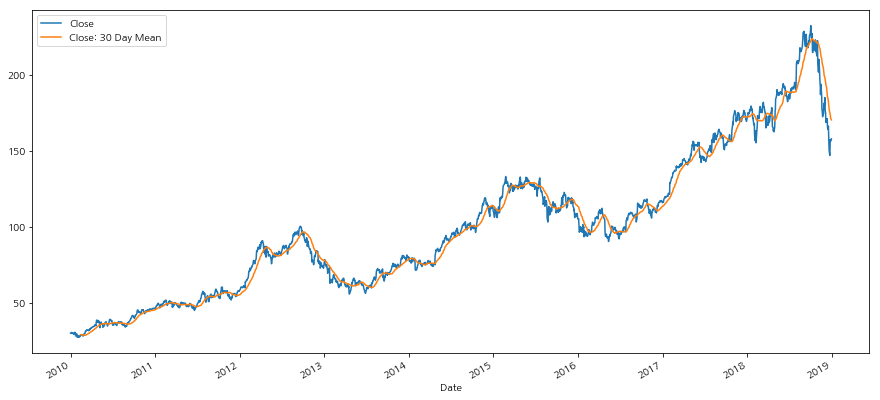

In [10]:
# 데이터프레임에 rolling mean 결과를 별도 칼럼으로 추가한 후 plotting 하면 pandas 는 칼럼 이름으로 범례(legend)를 만들어줍니다.
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7))

## expanding
rolling mean 을 시간간격에 국한시키지 않고 시계열 데이터의 시작점부터 넓혀가며 구하려면 **expanding** 메서드를 사용합니다.

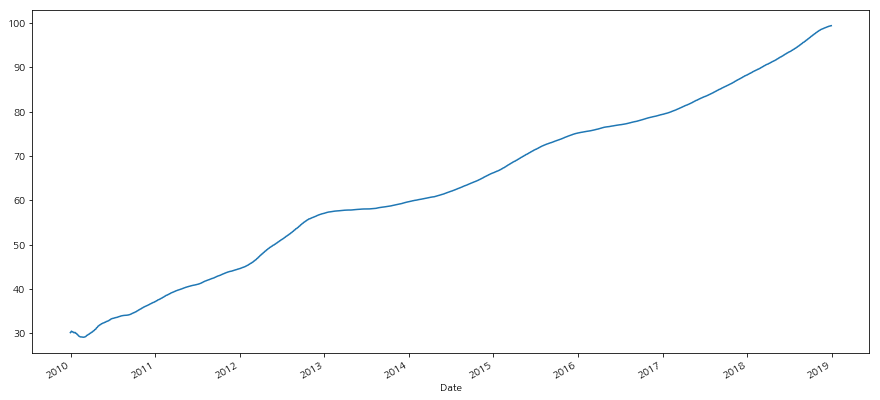

In [11]:
# min_periods : 최소 주기 설정
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))